In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.head()
#Outcome = 1 (has diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
dataset.shape

(2000, 9)

In [5]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
dataset.notnull().any()

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
#dataset statistics as transpose
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
dataset = dataset.rename(columns={'DiabetesPedigreeFunction':'DPF'})

In [11]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

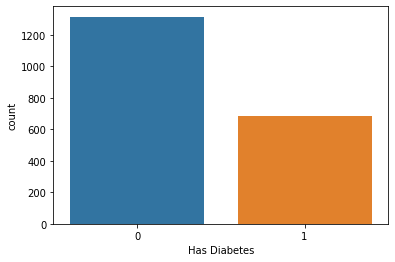

In [13]:
g1 = sns.countplot(x="Outcome", data=dataset)
plt.xlabel('Has Diabetes')
plt.show()

In [14]:
#Some columns have 0 values which can be replaced with Not a Number
dataset.describe().T
#as can be seen in minimum value columns (Glucose, BP, ST, Insulin, BMI) cannot be 0

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DPF,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [15]:
dataset_copy = dataset.copy(deep = True)

In [16]:
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [17]:
dataset_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

# Fill NaN 

In [18]:
#To fill NaN we need to check the data distribution and then replace the NaN columns with mean, median depending on columns

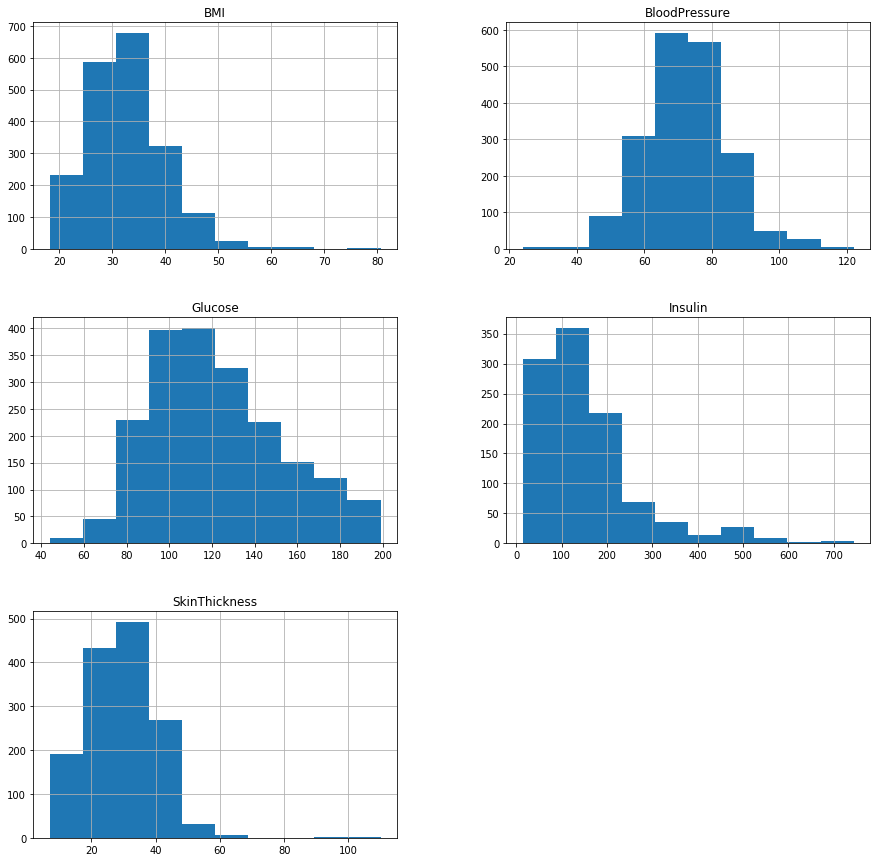

In [19]:
plot = pd.DataFrame(dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
hist = plot.hist(figsize = (15,15))

In [20]:
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(), inplace=True)
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean(), inplace=True)
dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(), inplace=True)
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(), inplace=True)
dataset_copy['BMI'].fillna(dataset_copy['BMI'].median(), inplace=True)

In [21]:
dataset_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [22]:
datasetN = dataset_copy

In [23]:
datasetN['Age'].max()

81

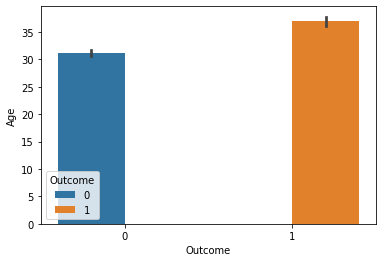

In [24]:
sns.barplot(x='Outcome',y='Age',data=datasetN,hue="Outcome")


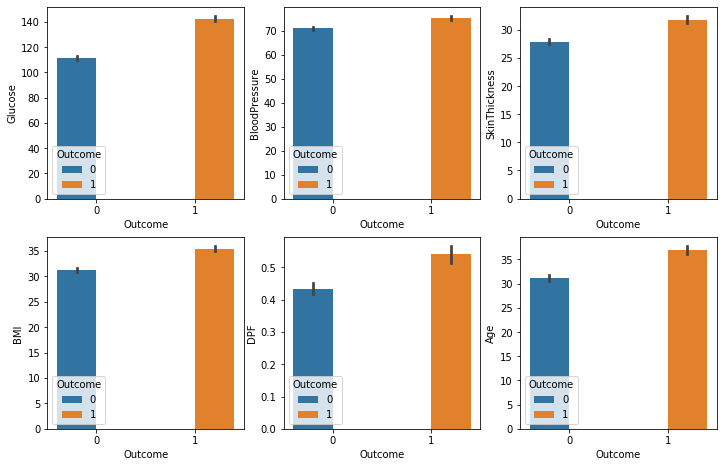

In [25]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=datasetN,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=datasetN,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=datasetN,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=datasetN,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DPF',data=datasetN,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=datasetN,hue="Outcome")